# Logistic regression

### Context
The original dataset contains 1000 entries with 20 categorical/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. It is almost impossible to understand the original dataset due to its complicated system of categories and symbols. Thus, the attributes in this dataset is a subset of the original dataset. Several columns are simply ignored, and some of the important attributes like age, account balance etc. are retained.

### Objective 
To identify if a person is at risk of making default or not.

### Dataset:
- Age (Numeric : Age in years)
- Sex (Categories : male, female)
- Job (Categories : 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Housing (Categories : own, rent, or free)
- Saving accounts (Categories : little, moderate, quite rich, rich)
- Checking account (Categories : little, moderate, rich)
- Credit amount (Numeric : Amount of credit in DM - Deutsche Mark)
- Duration (Numeric : Duration for which the credit is given in months)
- Purpose (Categories: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)
- Risk (0 - Person is not at risk, 1 - Pesron is at risk(defaulter))

## Import necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn import metrics

### Read the Dataset

In [2]:
df = pd.read_csv('German_Credit.csv')

### View first and last 5 rows of dataset

In [3]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [4]:
df.tail()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,0
996,40,male,3,own,little,little,3857,30,car,0
997,38,male,2,own,little,NaN,804,12,radio/TV,0
998,23,male,2,free,little,little,1845,45,radio/TV,1
999,27,male,2,own,moderate,moderate,4576,45,car,0


### Understand the shape of the dataset.

In [5]:
df.shape

(1000, 10)

### Check the data types of the columns for the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


* Age, job, Credit Amount, Duration, Risk are integers
* Sex, Housing, Saving accounts, Checking account, Purpose are objects
* Risk is dependent variable, we need to convert that to categorical

In [7]:
df["Risk"] = df["Risk"].astype("category")

### Summary of the dataset.

In [8]:
df.describe(include="all")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000,1000.0
unique,NaN,2,NaN,3,4,3,NaN,NaN,8,2.0
top,NaN,male,NaN,own,little,little,NaN,NaN,car,0.0
freq,NaN,690,NaN,713,603,274,NaN,NaN,337,700.0
mean,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


**Observation** 
* Most of the customers are not at risk
* Mean amount of credit people have is 3271.24800
* Mean amount of months people take credit for is 20.903000

### Check and treat for missing values

In [9]:
df.isna().sum()/len(df.isna())

Age                 0.000
Sex                 0.000
Job                 0.000
Housing             0.000
Saving accounts     0.183
Checking account    0.394
Credit amount       0.000
Duration            0.000
Purpose             0.000
Risk                0.000
dtype: float64

* We can see that two columns - 'Saving accounts' and 'Checking account' have 18% and 39% missing values respectively.
* We can either drop these columns or drop rows with missing values but then we would lose data for such a small dataset.
* As both of these columns are categorical, we can treat those missng values as a new category.

In [10]:
df['Saving accounts'].fillna(value='unknown',inplace=True)
df['Checking account'].fillna(value='unknown',inplace=True)
df.isna().sum()/len(df.isna())

Age                 0.0
Sex                 0.0
Job                 0.0
Housing             0.0
Saving accounts     0.0
Checking account    0.0
Credit amount       0.0
Duration            0.0
Purpose             0.0
Risk                0.0
dtype: float64

### Univariate analysis

In [11]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

## Observations on Risk

C:\Users\Laveena Garg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


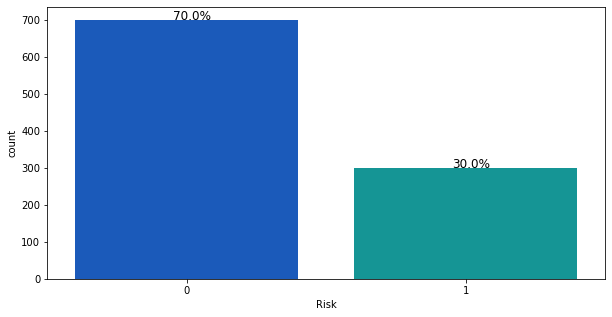

In [12]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["Risk"],palette='winter')
perc_on_bar(ax,df["Risk"])

* 70% of the customers are not at risk of default

## Observations on Sex of Customers

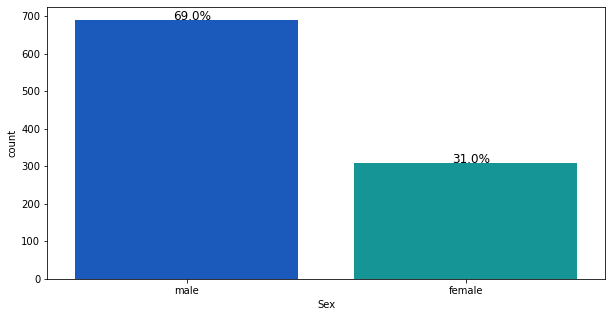

In [13]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["Sex"],palette='winter')
perc_on_bar(ax,df["Sex"])

* Most of the customers who take credit are males

### Observations on Housing

C:\Users\Laveena Garg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


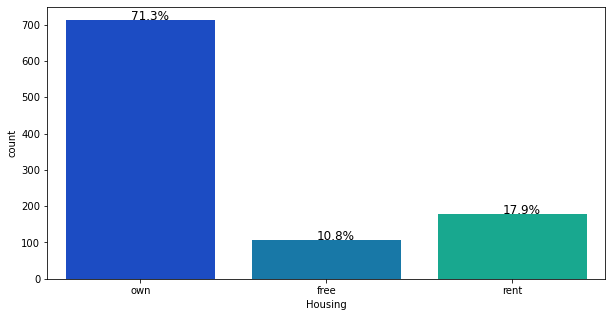

In [14]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["Housing"],palette='winter')
perc_on_bar(ax,df["Housing"])

* Most people who take credit have there own house

### Observations on Job

C:\Users\Laveena Garg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


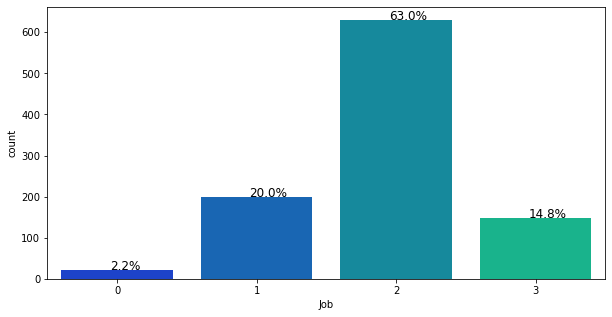

In [15]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["Job"],palette='winter')
perc_on_bar(ax,df["Job"])

* Most of the credit takers are under skilled job category

### Observations on Saving accounts

C:\Users\Laveena Garg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


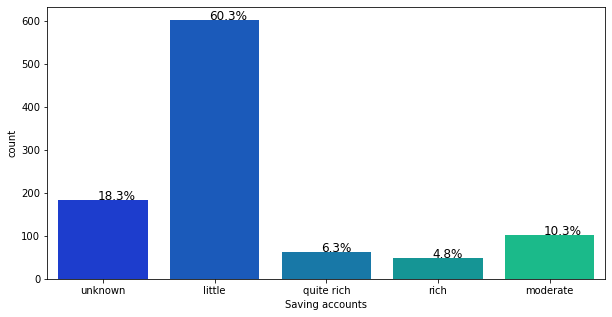

In [16]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["Saving accounts"],palette='winter')
perc_on_bar(ax,df["Saving accounts"])

* Most people with little amount in savings account takes credit

### Observations on Checking account

C:\Users\Laveena Garg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


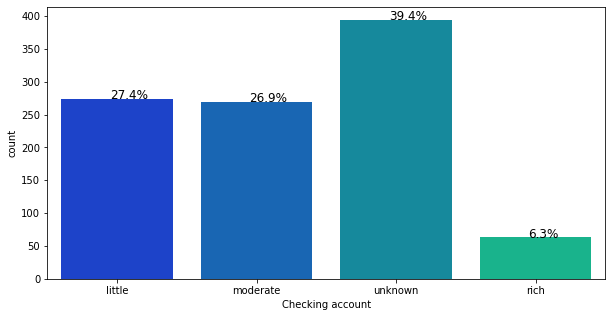

In [17]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["Checking account"],palette='winter')
perc_on_bar(ax,df["Checking account"])

* Here customers with unknown information on checking account seems to take more credits

### Observations on Purpose

C:\Users\Laveena Garg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


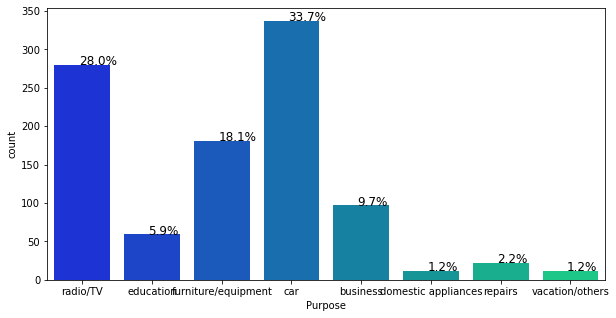

In [18]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["Purpose"],palette='winter')
perc_on_bar(ax,df["Purpose"])

* Most of the people take credits for buying car followed by radio/TV

### Bivariate Analysis

In [19]:
## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df['Risk'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['Risk'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    #plt.legend(loc='lower left', frameon=False)
    #plt.legend(loc="upper left", bbox_to_anchor=(0,1))
    plt.show()

Risk      0    1   All
Sex                   
female  201  109   310
male    499  191   690
All     700  300  1000
------------------------------------------------------------------------------------------------------------------------


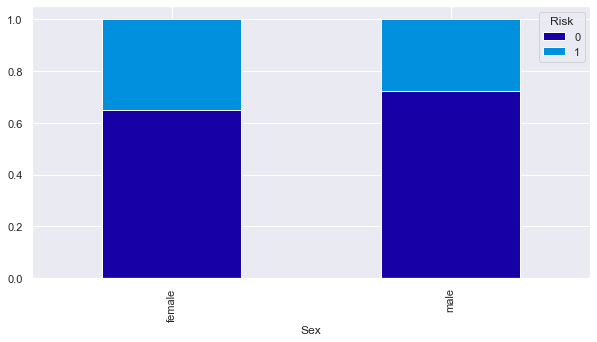

In [20]:
stacked_plot(df['Sex'])

* Males are at less risk of default as comapred to females

Risk    0    1   All
Job                 
0      15    7    22
1     144   56   200
2     444  186   630
3      97   51   148
All   700  300  1000
------------------------------------------------------------------------------------------------------------------------


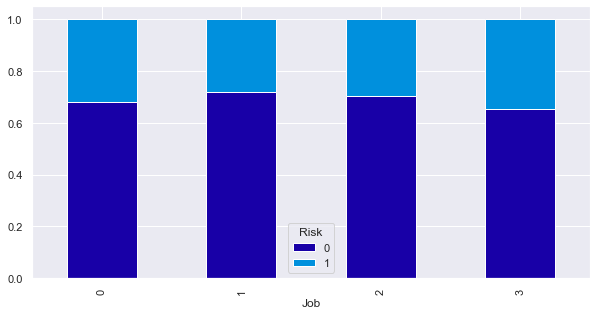

In [21]:
stacked_plot(df['Job'])

* People doing any job seems to be at same level of risk for default

Risk       0    1   All
Housing                
free      64   44   108
own      527  186   713
rent     109   70   179
All      700  300  1000
------------------------------------------------------------------------------------------------------------------------


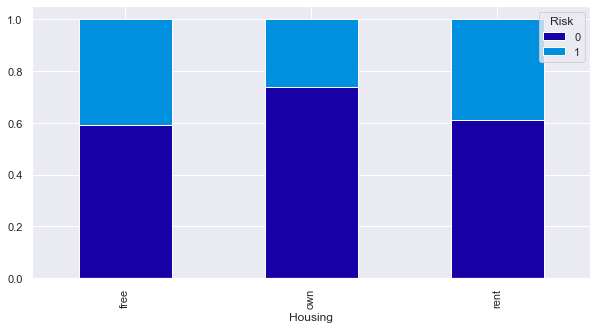

In [22]:
stacked_plot(df['Housing'])

* Customers owning a house are at less risk of defaulting

Risk               0    1   All
Saving accounts                
little           386  217   603
moderate          69   34   103
quite rich        52   11    63
rich              42    6    48
unknown          151   32   183
All              700  300  1000
------------------------------------------------------------------------------------------------------------------------


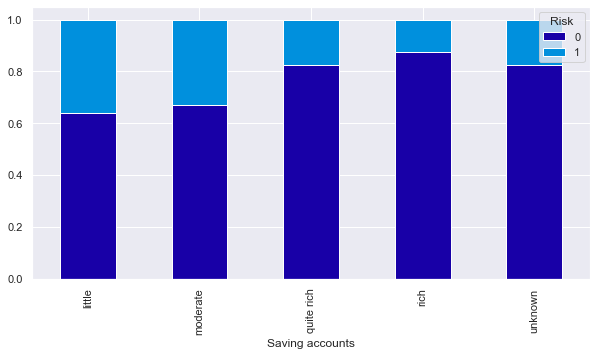

In [23]:
stacked_plot(df['Saving accounts'])

* Customers with rich savings account are at less risk of default

Risk                0    1   All
Checking account                
little            139  135   274
moderate          164  105   269
rich               49   14    63
unknown           348   46   394
All               700  300  1000
------------------------------------------------------------------------------------------------------------------------


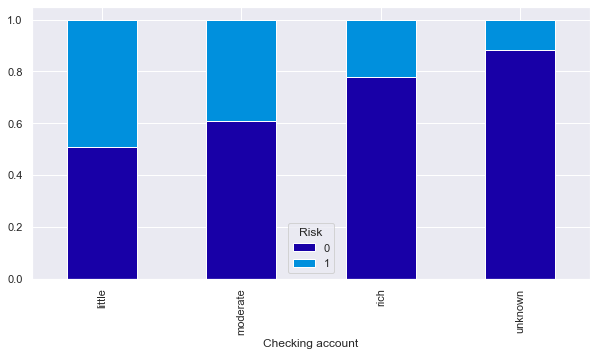

In [24]:
stacked_plot(df['Checking account'])

* People with unknown checking accounts are at less risk of default, while with little amount in checking accounts are at higher risk of default

Risk                   0    1   All
Purpose                            
business              63   34    97
car                  231  106   337
domestic appliances    8    4    12
education             36   23    59
furniture/equipment  123   58   181
radio/TV             218   62   280
repairs               14    8    22
vacation/others        7    5    12
All                  700  300  1000
------------------------------------------------------------------------------------------------------------------------


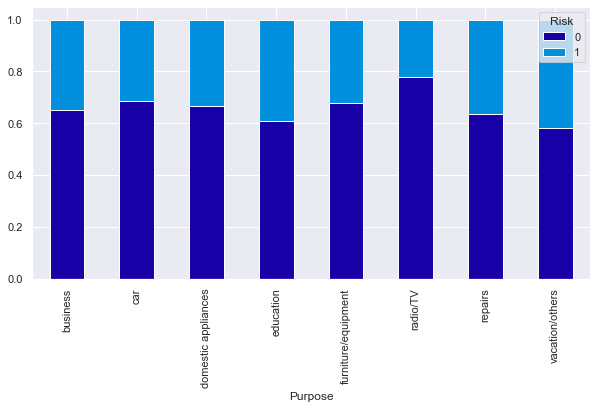

In [25]:
stacked_plot(df['Purpose'])

* different purposes doesn't seem to have any specific effect on amount of risk

Risk    0    1   All
Age                 
19      1    1     2
20      9    5    14
21      9    5    14
22     16   11    27
23     28   20    48
24     25   19    44
25     22   19    41
26     36   14    50
27     38   13    51
28     28   15    43
29     22   15    37
30     29   11    40
31     27   11    38
32     25    9    34
33     20   13    33
34     21   11    32
35     34    6    40
36     33    6    39
37     21    8    29
38     20    4    24
39     15    6    21
40     19    6    25
41     13    4    17
42     14    8    22
43     12    5    17
44     12    5    17
45     12    3    15
46     14    4    18
47     12    5    17
48      9    3    12
49     13    1    14
50      9    3    12
51      7    1     8
52      8    1     9
53      2    5     7
54      8    2    10
55      5    3     8
56      3    0     3
57      6    3     9
58      3    2     5
59      2    1     3
60      3    3     6
61      4    3     7
62      2    0     2
63      7    1     8
64      5    

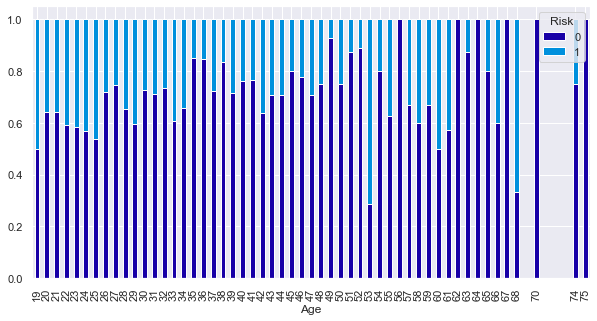

In [26]:
stacked_plot(df['Age'])

* People with age inbetween 34 and 57 are less probable to default

Risk        0    1   All
Duration                
4           6    0     6
5           1    0     1
6          66    9    75
7           5    0     5
8           6    1     7
9          35   14    49
10         25    3    28
11          9    0     9
12        130   49   179
13          4    0     4
14          3    1     4
15         52   12    64
16          1    1     2
18         71   42   113
20          7    1     8
21         21    9    30
22          2    0     2
24        128   56   184
26          1    0     1
27          8    5    13
28          2    1     3
30         27   13    40
33          2    1     3
36         46   37    83
39          4    1     5
40          0    1     1
42          8    3    11
45          1    4     5
47          1    0     1
48         20   28    48
54          1    1     2
60          7    6    13
72          0    1     1
All       700  300  1000
----------------------------------------------------------------------------------------------------

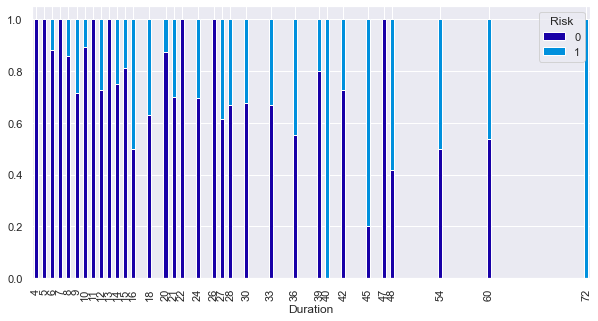

In [27]:
stacked_plot(df['Duration'])

* credit given for durations less than 12 months are at very low risk, while if given for more than 12 months then there are more chances of default

## Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Built a Logistic regression on the train data.
4. Remove multicollinearity and insignificant variables, if any
5. Choose optimal threshold, if required.
6. Test the data on test set.

### Model evaluation criterion

### We will be using Precision as a metric for our model performance, because here company could face 2 types of losses
1. Could Give loan to defaulters - Loss of money
2. Not give Loan to non-defaulters - Loss of opportunity

### Which Loss is greater ? 
* Giving loan to defaulters i.e. False negative i.e Predicting a person not at risk, while in actual person is at risk of making a default 

### How to reduce this loss i.e need to reduce False Negatives ?
* Company wants Recall to be maximized, greater the recall lesser the chances of false negatives

### Split data

In [46]:
X=df.drop(columns=['Risk']) #Dropping continuous 'Age' and 'Credit amount' and keeping the categorical ones we created above
Y=df['Risk']
X.Duration=X.Duration/12 #Converting monthly values to yearly, Logistic Regression depends on the scale of the variables so it helps to have variables with similar scale or small scale.
X =pd.get_dummies(data=X,drop_first=True)

### Fit logistic regression model  (Statsmodel) 

In [47]:
import statsmodels.api as sm

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42 )
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

logit = sm.Logit( y_train, X_train )

lg = logit.fit()

print(lg.summary2())

# Let's Look at Model Performance
y_pred = lg.predict(X_train) 
pred_train = list(map(round, y_pred))

y_pred1 = lg.predict(X_test) 
pred_test = list(map(round, y_pred1))

print('recall on train data:',recall_score(y_train, pred_train) )
print('recall on test data:',recall_score(y_test, pred_test))

Optimization terminated successfully.
         Current function value: 0.503938
         Iterations 6
                              Results: Logit
Model:                  Logit               Pseudo R-squared:    0.173     
Dependent Variable:     Risk                AIC:                 749.5138  
Date:                   2021-02-09 15:55    BIC:                 849.6375  
No. Observations:       700                 Log-Likelihood:      -352.76   
Df Model:               21                  LL-Null:             -426.75   
Df Residuals:           678                 LLR p-value:         4.2196e-21
Converged:              1.0000              Scale:               1.0000    
No. Iterations:         6.0000                                             
---------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
const            

* The outputs are not reliable, because data might contain multicollinearity - so let's deal with that first

### Check and treat multicollinearity

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])],index=X_train.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                          64.399440
Age                             1.187299
Job                             1.140032
Credit amount                   1.973930
Duration                        1.790918
Sex_male                        1.106095
Housing_own                     2.605568
Housing_rent                    2.699594
Saving accounts_moderate        1.114480
Saving accounts_quite rich      1.081380
Saving accounts_rich            1.071061
Saving accounts_unknown         1.141349
Checking account_moderate       1.651880
Checking account_rich           1.209496
Checking account_unknown        1.719470
Purpose_car                     3.340613
Purpose_domestic appliances     1.175755
Purpose_education               1.585808
Purpose_furniture/equipment     2.495637
Purpose_radio/TV                3.084745
Purpose_repairs                 1.263508
Purpose_vacation/others         1.211431
dtype: float64



* None of the variables seems to be correlated, so the values in summary are reliable

* Job has p value = 0.7901, which shows job to be insignificant - this was visible through EDA also
* Credit amount has coefficient = 0.0000  and p value = 0.4144 - again insignificant
* Sex also have p value more than 0.05
* some variables of housing and savings account and checking account are significant, so we won't drop any of these
* Purpose has p value greater than 0.05
* **Let's drop them one by one**

### Drop insignificant variables

In [31]:
#job has highest p values among those with p-value greater than 0.05
X_train1 = X_train.drop('Job', axis =1)
X_test1 = X_test.drop('Job',axis =1)

logit1 = sm.Logit(y_train, X_train1 )
lg1 = logit1.fit()
print(lg1.summary2())

# Let's Look at Model Performance
y_pred = lg1.predict(X_train1) 
pred_train = list(map(round, y_pred))

y_pred1 = lg1.predict(X_test1) 
pred_test = list(map(round, y_pred1))

print('Recall on train data:',recall_score(y_train, pred_train) )
print('Recall on test data:',recall_score(y_test, pred_test))

Optimization terminated successfully.
         Current function value: 0.503989
         Iterations 6
                              Results: Logit
Model:                  Logit               Pseudo R-squared:    0.173     
Dependent Variable:     Risk                AIC:                 747.5847  
Date:                   2021-02-09 15:54    BIC:                 843.1574  
No. Observations:       700                 Log-Likelihood:      -352.79   
Df Model:               20                  LL-Null:             -426.75   
Df Residuals:           679                 LLR p-value:         1.5686e-21
Converged:              1.0000              Scale:               1.0000    
No. Iterations:         6.0000                                             
---------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
const            

* Not much change in recall, let's drop Purpose now

In [32]:
#purpose has highest p values among those with p-value greater than 0.05
X_train2 = X_train1.drop(['Purpose_car','Purpose_domestic appliances','Purpose_education','Purpose_furniture/equipment','Purpose_radio/TV','Purpose_repairs','Purpose_vacation/others'], axis =1)
X_test2 = X_test1.drop(['Purpose_car','Purpose_domestic appliances','Purpose_education','Purpose_furniture/equipment','Purpose_radio/TV','Purpose_repairs','Purpose_vacation/others'],axis =1)

logit2 = sm.Logit(y_train, X_train2 )
lg2 = logit2.fit()
print(lg2.summary2())

# Let's Look at Model Performance
y_pred = lg2.predict(X_train2) 
pred_train = list(map(round, y_pred))

y_pred1 = lg2.predict(X_test2) 
pred_test = list(map(round, y_pred1))

print('recall on train data:',recall_score(y_train, pred_train) )
print('recall on test data:',recall_score(y_test, pred_test))

Optimization terminated successfully.
         Current function value: 0.511058
         Iterations 6
                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.162     
Dependent Variable:    Risk                AIC:                 743.4807  
Date:                  2021-02-09 15:54    BIC:                 807.1959  
No. Observations:      700                 Log-Likelihood:      -357.74   
Df Model:              13                  LL-Null:             -426.75   
Df Residuals:          686                 LLR p-value:         5.2246e-23
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        6.0000                                             
--------------------------------------------------------------------------
                            Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
const                       

* no much change in recall

In [33]:
#Credit amount has highest p values among those with p-value greater than 0.05
X_train3 = X_train2.drop('Credit amount', axis =1)
X_test3 = X_test2.drop('Credit amount',axis =1)

logit3 = sm.Logit(y_train, X_train3 )
lg3 = logit3.fit()
print(lg3.summary2())

# Let's Look at Model Performance
y_pred = lg3.predict(X_train3) 
pred_train = list(map(round, y_pred))

y_pred1 = lg3.predict(X_test3) 
pred_test = list(map(round, y_pred1))

print('recall on train data:',recall_score(y_train, pred_train) )
print('recall on test data:',recall_score(y_test, pred_test))

Optimization terminated successfully.
         Current function value: 0.512003
         Iterations 6
                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.160     
Dependent Variable:    Risk                AIC:                 742.8047  
Date:                  2021-02-09 15:54    BIC:                 801.9688  
No. Observations:      700                 Log-Likelihood:      -358.40   
Df Model:              12                  LL-Null:             -426.75   
Df Residuals:          687                 LLR p-value:         2.7680e-23
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        6.0000                                             
--------------------------------------------------------------------------
                            Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
const                       

* recall on train increased from .40 to .43 and on test fom .36 to .37 - Now let's drop Sex_male

In [34]:
#Sex_male has highest p values among those with p-value greater than 0.05
X_train4 = X_train3.drop('Sex_male', axis =1)
X_test4 = X_test3.drop('Sex_male',axis =1)

logit4 = sm.Logit(y_train, X_train4 )
lg4 = logit4.fit()
print(lg4.summary2())

# Let's Look at Model Performance
y_pred = lg4.predict(X_train4) 
pred_train = list(map(round, y_pred))

y_pred1 = lg4.predict(X_test4) 
pred_test = list(map(round, y_pred1))

print('recall on train data:',recall_score(y_train, pred_train) )
print('recall on test data:',recall_score(y_test, pred_test))

Optimization terminated successfully.
         Current function value: 0.514322
         Iterations 6
                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.156     
Dependent Variable:    Risk                AIC:                 744.0502  
Date:                  2021-02-09 15:54    BIC:                 798.6632  
No. Observations:      700                 Log-Likelihood:      -360.03   
Df Model:              11                  LL-Null:             -426.75   
Df Residuals:          688                 LLR p-value:         3.4696e-23
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        6.0000                                             
--------------------------------------------------------------------------
                            Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
const                       

* recall on train is same 
* So lg4 is the final model that we will use for predictions and inferences

### Let's use model 'lg4' for making interpretations
* As per lg4, Age, Duration, Housing, Savings accounts, checking accounts are important variables here
* All variables except Duration have negative signs, i.e increase in these will lead to decrease in chances of default
* 1 unit increase in Age decreases the odds of being defaulter by 3.03%
* This relates to changes in probability by .75
* Similarly for all the other variables

* Please note that when coefficient is b , than change in odds is (exp(b)-1)*100 %
* Probability = odd/(1+odd)


### Check Model Performance

In [35]:
# Let's Look at Model Performance
y_pred = lg4.predict(X_train4) 
pred_train = list(map(round, y_pred))

y_pred1 = lg4.predict(X_test4) 
pred_test = list(map(round, y_pred1))

In [36]:
#Model performance with 0.5 threshold

print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test))

print('Recall on train data:',recall_score(y_train, pred_train) )
print('Recall on test data:',recall_score(y_test, pred_test))

print('Precision on train data:',precision_score(y_train, pred_train) )
print('Precision on test data:',precision_score(y_test, pred_test))

print('f1 score on train data:',f1_score(y_train, pred_train))
print('f1 score on test data:',f1_score(y_test, pred_test))

Accuracy on train data: 0.7614285714285715
Accuracy on test data: 0.7333333333333333
Recall on train data: 0.40669856459330145
Recall on test data: 0.3626373626373626
Precision on train data: 0.6640625
Precision on test data: 0.6
f1 score on train data: 0.5044510385756676
f1 score on test data: 0.4520547945205479


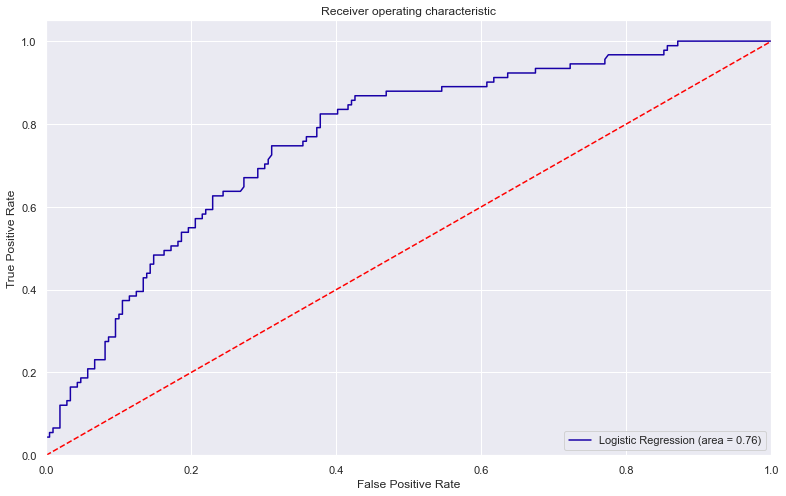

In [37]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, lg4.predict(X_test4))
fpr, tpr, thresholds = roc_curve(y_test, lg4.predict(X_test4))
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Try to improve Recall using AUC-ROC curve

In [49]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_test, lg4.predict(X_test4))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.2379202144265259


In [50]:
# Model prediction with optimal threshold
pred_train_opt = (lg.predict(X_train)>optimal_threshold).astype(int)
pred_test_opt = (lg.predict(X_test)>optimal_threshold).astype(int)

In [51]:
#Model performance with optimal threhold

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt))
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))

print('f1 score on train data:',f1_score(y_train, pred_train_opt))
print('f1 score on test data:',f1_score(y_test, pred_test_opt))

Accuracy on train data: 0.6728571428571428
Accuracy on test data: 0.6733333333333333
Recall on train data: 0.8373205741626795
Recall on test data: 0.8021978021978022
Precision on train data: 0.47297297297297297
Precision on test data: 0.477124183006536
f1 score on train data: 0.6044905008635578
f1 score on test data: 0.5983606557377049


* Recall has improved to quite good extent.

### Now Let's use Precision-Recall curve and see if we can find a better threshold

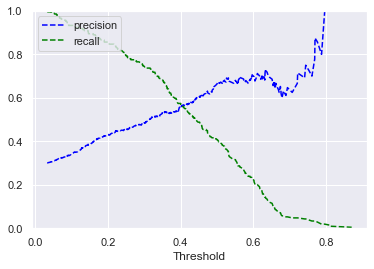

In [41]:
from sklearn.metrics import precision_recall_curve

y_scores=lg4.predict(X_train4)
prec, rec, tre = precision_recall_curve(y_train, y_scores, )

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])

plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* Decreasing threshold beyond 0.3 will lead to fast decrease in Precision, which will lead to great loss of opportunity, so let's consider threshold of 0.3

### Check Model Performance

In [48]:
optimal_threshold = 0.3

# Model prediction with optimal threshold
pred_train_opt = (lg.predict(X_train)>optimal_threshold).astype(int)
pred_test_opt = (lg.predict(X_test)>optimal_threshold).astype(int)

#Model performance with optimal threhold

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt))
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))

print('f1 score on train data:',f1_score(y_train, pred_train_opt))
print('f1 score on test data:',f1_score(y_test, pred_test_opt))

Accuracy on train data: 0.7071428571428572
Accuracy on test data: 0.7
Recall on train data: 0.7416267942583732
Recall on test data: 0.6593406593406593
Precision on train data: 0.5065359477124183
Precision on test data: 0.5042016806722689
f1 score on train data: 0.6019417475728155
f1 score on test data: 0.5714285714285715


* The previous model was better, where we chose optimal threshold using AUC-ROC curve

### Make confusion matrix

In [43]:
from sklearn.metrics import classification_report,confusion_matrix



def make_confusion_matrix(y_actual,y_predict,labels=[1, 0]):
    '''
    y_predict: prediction of class
    y_actual : ground truth  
    '''
    cm=confusion_matrix( y_predict,y_actual, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ['1','0']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



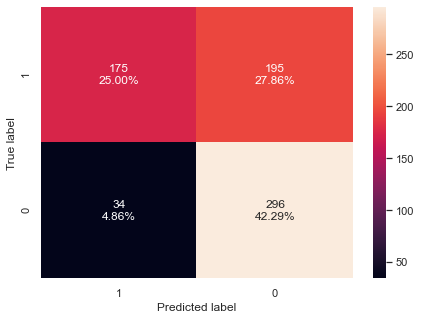

In [52]:
# let us make confusion matrix on train set
make_confusion_matrix(y_train,pred_train_opt)

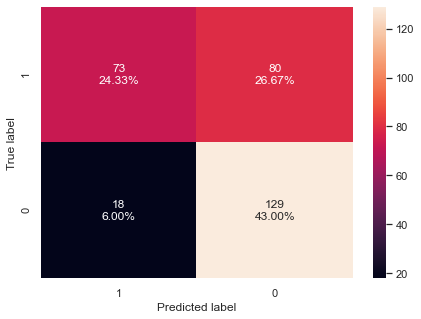

In [53]:
# let us make confusion matrix on test set
make_confusion_matrix(y_test,pred_test_opt)

### Business insights
* We could see that people owning their own house are less probable to default
* As the duration for which credit is taken increases, chances of default increases
* people in quite rich category of savings account has least chances of default, while people in little category of savings account are most probable to default

**So we could conclude that**
* Credit should be given for lesser durations(12 months or less), to people of age inbetween 34 and 57, owning a house, and belonging to rich/quite rich category of savings account
